In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns

#Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_parquet("C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/FimaNfipClaims.parquet.gzip")

In [3]:
df.head()

,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDamageAmount,contentsDeductibleCode,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,eventDesignationNumber,ficoNumber,floodCharacteristicsIndicator,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nfipCommunityName,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,floodZoneCurrent,buildingDescriptionCode,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id
0,0,2020-01-22T16:55:53.000Z,NaN,1,8.0,1998-02-07T00:00:00.000Z,0,None,NaN,NaN,X,0,NaN,NaN,NaN,4.0,0,10.0,1.0,1963-01-01T00:00:00.000Z,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,NaN,0,0.0,NaN,0.0,None,612.0,NaN,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,None,"OCEANSIDE, CITY OF",97.0,1.0,1.0,937.0,NaN,A,0,0.0,None,NaN,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,4053d562-94c7-4155-9d60-3030f34a7abc
1,0,2020-01-22T16:55:53.000Z,NaN,1,8.0,2005-08-29T00:00:00.000Z,0,None,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,NaN,1.0,1967-07-01T00:00:00.000Z,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,NaN,0,0.0,NaN,0.0,None,654.0,NaN,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,None,NEW ORLEANS/ORLEANS PARISH*,6.0,6.0,1.0,NaN,NaN,A,0,0.0,None,NaN,0,LA,Currently Unavailable,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,4094445e-bc54-42b2-a60d-b949bdc2df3a
2,0,2020-01-22T16:55:53.000Z,NaN,1,9.0,1998-09-28T00:00:00.000Z,0,None,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,10.0,1.0,1972-01-01T00:00:00.000Z,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,2220.0,0,1720.0,0.0,0.0,None,133.0,NaN,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,None,SANTA ROSA COUNTY *,NaN,NaN,1.0,100000.0,0.0,A,0,0.0,None,NaN,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,659ba8e0-1bb3-4442-ad57-3f384db43176
3,0,2019-09-19T13:45:58.000Z,1.0,1,9.0,1994-10-07T00:00:00.000Z,0,None,NaN,NaN,X,0,NaN,NaN,NaN,2.0,0,10.0,1.0,1960-01-01T00:00:00.000Z,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,NaN,0,0.0,NaN,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,450026.0,None,"BEAUFORT, CITY OF",97.0,NaN,1.0,0.0,NaN,A,0,0.0,None,NaN,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,97063578-59b6-403d-b9c3-2e70fd8b6f38
4,0,2019-09-19T13:45:58.000Z,NaN,1,8.0,1996-03-11T00:00:00.000Z,0,None,NaN,NaN,X,0,NaN,NaN,NaN,1.0,0,NaN,1.0,1988-01-01T00:00:00.000Z,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,3115.0,0,1545.0,0.0,0.0,None,NaN,NaN,0.0,0,None,NaN,0.0,125092.0,None,BREVARD COUNTY *,NaN,NaN,1.0,0.0,0.0,A,0,0.0,None,1.0,0,FL,Currently Unavailable,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,613c20ef-7838-48ee-a257-07a49e997d3a


## Data filtering and creation of new variables

In [4]:
# dropping extreme and creating outcome variable relative_damage

df['buildingrelativeDamage'] = df['buildingDamageAmount']/df['buildingPropertyValue']

df['buildingrelativeDamage'].replace([np.inf, -np.inf], np.nan, inplace=True)

### Analysis of outcome variable 'buildingrelativeDamage'

Text(0.5, 1.0, 'Relative Damage Frequency for Relative Damage in (1, 3). 1080 observations; Median of 1.1')

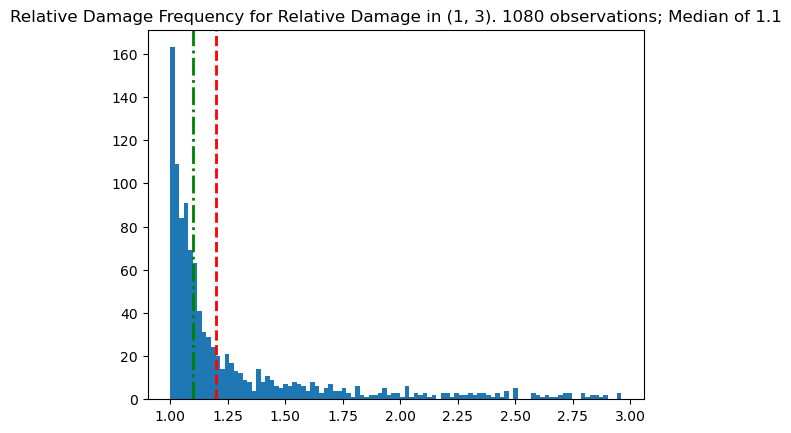

In [5]:
plt.hist(df['buildingrelativeDamage'][(df['buildingrelativeDamage']<3) & (df['buildingrelativeDamage']> 1)] , bins = 100)
plt.axvline(x=1.2, color='r', linestyle='--', linewidth=2, label='x=1.2')
plt.axvline(x=1.1, color='g', linestyle='-.', linewidth=2, label='x=1.1')

plt.title('Relative Damage Frequency for Relative Damage in (1, 3). 1080 observations; Median of 1.1')

In [6]:
#get count of number of observations in (1, 3) interval. 1080
print(f"count of number of observations in (1, 3) interval: {len(df['buildingrelativeDamage'][(df['buildingrelativeDamage']<3) & (df['buildingrelativeDamage']> 1)])}")

#count of relative damage >3. only 207
print(f"\n\ncount of relative damage >=3 in the entire dataset: {len(df['buildingrelativeDamage'][ (df['buildingrelativeDamage']>=3)])}")

#median relative damage in interval
print(f"\n\nmedian relative damage in (1, 3) interval: {df['buildingrelativeDamage'][(df['buildingrelativeDamage']<3) & (df['buildingrelativeDamage']> 1)].median()}")

#get count of number of observations greater than 1 less than or equal to 1.2: 711
print(f"\n\ncount of number of observations greater than 1 less than or equal to 1.2: {len(df['buildingrelativeDamage'][(df['buildingrelativeDamage']<=1.2) &(df['buildingrelativeDamage']> 1)])}")

print(f"\n\nfraction of observations less than or equal to 1.2 and greater than 1 wrt to total observations > 1: {711/(1080+207)}")

count of number of observations in (1, 3) interval: 1080


count of relative damage >=3 in the entire dataset: 207


median relative damage in (1, 3) interval: 1.104790542610157


count of number of observations greater than 1 less than or equal to 1.2: 711


fraction of observations less than or equal to 1.2 and greater than 1 wrt to total observations > 1: 0.5524475524475524


cap at 1.2 recovers over 55% of over 1 relative damage values, and seems reasonable as a damage assessment

In [7]:
#filter relative damage to 1.2 or less (no negative values, so no need to filter out negative relative damages)
df_filtered = df[(df['buildingrelativeDamage'] <= 1.2) & (df['buildingrelativeDamage'] >= 0)]

#cap relative damage at 1
df_filtered.loc[df_filtered['buildingrelativeDamage'] > 1, 'buildingrelativeDamage'] = 1

In [8]:
# filter the dataset to be residential type (1,2,3), number of floor to be 1, Main House (1), water depth < 6 for a robust dataset to test on)

df_filtered = df_filtered[df_filtered['numberOfFloorsInTheInsuredBuilding'] == 1.0]
df_filtered = df_filtered[df_filtered['occupancyType'].isin([1.0, 2.0, 3.0])]
df_filtered = df_filtered[df_filtered['buildingDescriptionCode'] == 1.0]
df_filtered = df_filtered[(df_filtered['waterDepth'] < 6) & (df_filtered['waterDepth'] >= 0)]

print(f'Size of the dataset \nbefore filtering: {df.shape[0]} \nafter filtering {df_filtered.shape[0]} \ndifference: {df.shape[0] - df_filtered.shape[0]}')

Size of the dataset 
before filtering: 2597460 
after filtering 210108 
difference: 2387352


In [9]:
# Convert all relevant columns to datetime
df_filtered['dateOfLoss'] = pd.to_datetime(df_filtered['dateOfLoss'], errors='coerce')
df_filtered['originalConstructionDate_pddatetime'] = pd.to_datetime(df_filtered['originalConstructionDate'], errors='coerce')
df_filtered['originalNBDate_pddatetime'] = pd.to_datetime(df_filtered['originalNBDate'], errors='coerce')

# Calculate the age of the building and the policy until the flood
df_filtered['AgeofBuildinguntilflood'] = (df_filtered['dateOfLoss'] - df_filtered['originalConstructionDate_pddatetime']).dt.days / 365.25
df_filtered['AgeofPolicyuntilflood'] = (df_filtered['dateOfLoss'] - df_filtered['originalNBDate_pddatetime']).dt.days / 365.25

# # If you need the ages as whole numbers, you can round or floor them
# df_filtered['AgeofBuildinguntilflood'] = df_filtered['AgeofBuildinguntilflood'].round().astype('Int64')
# df_filtered['AgeofPolicyuntilflood'] = df_filtered['AgeofPolicyuntilflood'].round().astype('Int64')

### Variable selection and check for missing data

In [10]:
# done using FEMA documentation

variables_to_keep = [
    'elevatedBuildingIndicator',
    'elevationDifference',
    'baseFloodElevation',
    'ratedFloodZone',
    'occupancyType',
    'rateMethod',
    'crsClassificationCode',
    'elevationCertificateIndicator',
    'lowestFloorElevation',
    'lowestAdjacentGrade',
    'totalBuildingInsuranceCoverage',
    'totalContentsInsuranceCoverage',
    'primaryResidenceIndicator',
    'buildingPropertyValue',
    'causeOfDamage',
    'contentsPropertyValue',
    'disasterAssistanceCoverageRequired',
    'floodCharacteristicsIndicator',
    'floodproofedIndicator',
    'buildingReplacementCost',
    'contentsReplacementCost',
    'waterDepth',
    'floodZoneCurrent',
    'rentalPropertyIndicator',
    'postFIRMConstructionIndicator',
    'buildingrelativeDamage',
    'AgeofBuildinguntilflood',
    'AgeofPolicyuntilflood',
    'reportedZipCode',
    'countyCode',
    'censusTract',
    'censusBlockGroupFips',
    'latitude',
    'longitude',
    'state',
    'yearOfLoss'
]

df_filtered_subset = df_filtered[variables_to_keep]

In [11]:
df_filtered_subset.head()

,elevatedBuildingIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,occupancyType,rateMethod,crsClassificationCode,elevationCertificateIndicator,lowestFloorElevation,lowestAdjacentGrade,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,primaryResidenceIndicator,buildingPropertyValue,causeOfDamage,contentsPropertyValue,disasterAssistanceCoverageRequired,floodCharacteristicsIndicator,floodproofedIndicator,buildingReplacementCost,contentsReplacementCost,waterDepth,floodZoneCurrent,rentalPropertyIndicator,postFIRMConstructionIndicator,buildingrelativeDamage,AgeofBuildinguntilflood,AgeofPolicyuntilflood,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,state,yearOfLoss
4,0,NaN,NaN,X,1.0,7,8.0,None,NaN,NaN,100000.0,25000.0,1,100000.0,1,0.0,0.0,NaN,0,0.0,0.0,0.0,None,0,1,0.052520,8.191650,0.164271,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,FL,1996
115,0,NaN,NaN,X,1.0,1,9.0,None,NaN,NaN,150000.0,0.0,0,37260.0,1,NaN,0.0,NaN,0,113263.0,NaN,1.0,A04,0,0,0.083494,57.366188,1.273101,23505.0,51710.0,5.171000e+10,5.171000e+11,36.9,-76.3,VA,2009
118,0,NaN,NaN,C,1.0,1,7.0,None,NaN,NaN,239300.0,45300.0,1,191440.0,1,0.0,0.0,NaN,0,239300.0,0.0,0.0,AE,0,0,0.011737,38.212183,28.440794,32583.0,12113.0,1.211301e+10,1.211301e+11,30.6,-87.0,FL,2004
141,0,4.0,7.0,AE,1.0,1,8.0,None,11.0,NaN,102500.0,44800.0,1,82000.0,1,0.0,0.0,NaN,0,102500.0,0.0,0.0,None,0,0,0.800366,56.208077,17.459274,32507.0,12033.0,1.203300e+10,1.203300e+11,30.4,-87.3,FL,2004
160,0,3.0,11.0,AE,1.0,1,9.0,None,13.6,NaN,73700.0,4300.0,0,73700.0,1,NaN,0.0,NaN,0,0.0,NaN,0.0,None,0,1,0.070583,16.810404,9.180014,28445.0,37141.0,3.714192e+10,3.714192e+11,34.4,-77.6,NC,1996


## Reading and exploring geographic features

In [12]:
df_geographic_info = pd.read_csv("C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/svdGeographicVariablesWithMergeData.csv")

In [13]:
df_geographic_info.head()

,Unnamed: 0,original_index,reportedZipCode_x,countyCode_x,censusTract_x,censusBlockGroupFips_x,latitude_x,longitude_x,state_x,centroid_lat_x,centroid_long_x,h3,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18,svd_19,svd_20,svd_21,svd_22,svd_23,svd_24,svd_25,svd_26,svd_27,svd_28,svd_29,svd_30,reportedZipCode_y,countyCode_y,censusTract_y,censusBlockGroupFips_y,latitude_y,longitude_y,state_y,centroid_lat_y,centroid_long_y,year
0,0,0,92056,6073,6073018512,6.073019e+10,33.2,-117.3,CA,33.211862,-117.329977,8729a4294ffffff,1.774546,-1.103126,1.768020,-1.870246,-0.248187,1.374362,0.472315,1.187354,-1.982219,-1.824606,1.320108,-0.988220,0.104402,0.024751,-0.283559,0.418063,0.083397,1.116887,-0.603207,0.050379,0.929021,0.547388,-1.343377,0.344710,-0.313406,0.816226,0.491136,0.639307,0.006972,-0.124356,92056,6073,6073018512,60730185123,33.2,-117.3,CA,33.211862,-117.329978,1998
1,1,1,70131,22071,22071000616,2.207100e+11,29.9,-90.0,LA,29.918024,-89.997074,874446434ffffff,-0.363733,0.023164,-0.246714,0.226464,-0.230780,-0.644696,-0.128062,-0.214082,-0.770155,0.160270,0.065145,-0.065367,0.237029,-0.042192,0.596184,-1.616988,-0.441110,-0.827110,0.782143,-0.073584,0.467571,0.269655,0.020166,0.392584,0.328875,-0.003107,0.083614,-0.176460,-0.011863,0.095398,70131,22071,22071000616,220710006163,29.9,-90.0,LA,29.918024,-89.997074,2005
2,2,2,32566,12113,12113010815,1.211300e+11,30.4,-86.9,FL,30.392125,-86.930936,8744566c6ffffff,-0.487226,-0.190240,0.364396,-0.159709,-0.029696,-0.322152,0.834244,-0.014280,0.002545,-0.167933,-0.294170,2.041984,-2.373367,2.755253,-1.145958,-0.706078,0.918923,-0.506325,0.066679,-1.304258,0.407962,-2.432443,-0.501994,0.299886,-0.187492,0.220293,-0.809364,-1.113802,2.519074,-1.544782,32566,12113,12113010815,121130108152,30.4,-86.9,FL,30.392125,-86.930936,1998
3,3,3,29902,45013,45013000700,4.501300e+11,32.4,-80.7,SC,32.434712,-80.682657,8744d0b2cffffff,-0.483802,-0.165186,0.291715,0.077179,0.214199,-0.944381,2.282067,-0.332673,0.296988,0.422363,-0.325333,-2.923128,-0.801495,1.646409,3.526368,0.792007,-0.965128,0.313162,-1.618442,0.387545,-1.055773,0.660428,-0.989053,-0.456151,0.072725,-0.060861,0.354814,-0.208954,0.406184,-0.132717,29902,45013,45013000700,450130007002,32.4,-80.7,SC,32.434712,-80.682657,1994
4,4,4,32940,12009,12009063107,1.200910e+11,28.3,-80.7,FL,28.257577,-80.700013,8744a82caffffff,-0.191515,-0.277861,0.438251,-0.135808,0.257442,-0.905254,0.517394,0.198713,-1.311131,-0.560012,0.519368,0.064180,0.600630,1.447684,0.548300,1.195442,-1.206848,-1.677352,-0.290665,-0.008914,0.911473,-0.777211,-0.634360,0.905508,2.180291,-0.533245,0.392365,2.021945,-0.417581,-0.243402,32940,12009,12009063107,120090631073,28.3,-80.7,FL,28.257577,-80.700013,1996


In [14]:
# dropping and renaming to join with the filtered dataset

df_geographic_info = df_geographic_info.drop(columns=['Unnamed: 0', 'original_index', 'h3'])
df_geographic_info = df_geographic_info.rename(columns={
    'year': 'yearOfLoss',
    'reportedZipCode_y': 'reportedZipCode',
    'countyCode_y': 'countyCode',
    'censusTract_y': 'censusTract',
    'censusBlockGroupFips_y': 'censusBlockGroupFips',
    'latitude_y': 'latitude',
    'longitude_y': 'longitude',
    'state_y': 'state',
    'centroid_lat_y': 'centroid_lat',
    'centroid_long_y': 'centroid_long'
})

In [15]:
df_geographic_info.head()

,reportedZipCode_x,countyCode_x,censusTract_x,censusBlockGroupFips_x,latitude_x,longitude_x,state_x,centroid_lat_x,centroid_long_x,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18,svd_19,svd_20,svd_21,svd_22,svd_23,svd_24,svd_25,svd_26,svd_27,svd_28,svd_29,svd_30,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,state,centroid_lat,centroid_long,yearOfLoss
0,92056,6073,6073018512,6.073019e+10,33.2,-117.3,CA,33.211862,-117.329977,1.774546,-1.103126,1.768020,-1.870246,-0.248187,1.374362,0.472315,1.187354,-1.982219,-1.824606,1.320108,-0.988220,0.104402,0.024751,-0.283559,0.418063,0.083397,1.116887,-0.603207,0.050379,0.929021,0.547388,-1.343377,0.344710,-0.313406,0.816226,0.491136,0.639307,0.006972,-0.124356,92056,6073,6073018512,60730185123,33.2,-117.3,CA,33.211862,-117.329978,1998
1,70131,22071,22071000616,2.207100e+11,29.9,-90.0,LA,29.918024,-89.997074,-0.363733,0.023164,-0.246714,0.226464,-0.230780,-0.644696,-0.128062,-0.214082,-0.770155,0.160270,0.065145,-0.065367,0.237029,-0.042192,0.596184,-1.616988,-0.441110,-0.827110,0.782143,-0.073584,0.467571,0.269655,0.020166,0.392584,0.328875,-0.003107,0.083614,-0.176460,-0.011863,0.095398,70131,22071,22071000616,220710006163,29.9,-90.0,LA,29.918024,-89.997074,2005
2,32566,12113,12113010815,1.211300e+11,30.4,-86.9,FL,30.392125,-86.930936,-0.487226,-0.190240,0.364396,-0.159709,-0.029696,-0.322152,0.834244,-0.014280,0.002545,-0.167933,-0.294170,2.041984,-2.373367,2.755253,-1.145958,-0.706078,0.918923,-0.506325,0.066679,-1.304258,0.407962,-2.432443,-0.501994,0.299886,-0.187492,0.220293,-0.809364,-1.113802,2.519074,-1.544782,32566,12113,12113010815,121130108152,30.4,-86.9,FL,30.392125,-86.930936,1998
3,29902,45013,45013000700,4.501300e+11,32.4,-80.7,SC,32.434712,-80.682657,-0.483802,-0.165186,0.291715,0.077179,0.214199,-0.944381,2.282067,-0.332673,0.296988,0.422363,-0.325333,-2.923128,-0.801495,1.646409,3.526368,0.792007,-0.965128,0.313162,-1.618442,0.387545,-1.055773,0.660428,-0.989053,-0.456151,0.072725,-0.060861,0.354814,-0.208954,0.406184,-0.132717,29902,45013,45013000700,450130007002,32.4,-80.7,SC,32.434712,-80.682657,1994
4,32940,12009,12009063107,1.200910e+11,28.3,-80.7,FL,28.257577,-80.700013,-0.191515,-0.277861,0.438251,-0.135808,0.257442,-0.905254,0.517394,0.198713,-1.311131,-0.560012,0.519368,0.064180,0.600630,1.447684,0.548300,1.195442,-1.206848,-1.677352,-0.290665,-0.008914,0.911473,-0.777211,-0.634360,0.905508,2.180291,-0.533245,0.392365,2.021945,-0.417581,-0.243402,32940,12009,12009063107,120090631073,28.3,-80.7,FL,28.257577,-80.700013,1996


### Mapping both the datasets using the geographic information

In [16]:
# preprocessing on filterd dataset to join perfectly with geoinfo

df_filtered_subset['reportedZipCode'] = df_filtered_subset['reportedZipCode'].fillna(0)
df_filtered_subset['countyCode'] = df_filtered_subset['countyCode'].fillna(0)
df_filtered_subset['censusTract'] = df_filtered_subset['censusTract'].fillna(0)
df_filtered_subset['censusBlockGroupFips'] = df_filtered_subset['censusBlockGroupFips'].fillna(0)
df_filtered_subset['latitude'] = df_filtered_subset['latitude'].fillna(0)
df_filtered_subset['longitude'] = df_filtered_subset['longitude'].fillna(0)

df_filtered_subset['reportedZipCode'] = df_filtered_subset['reportedZipCode'].astype(int).astype(str)
df_filtered_subset['reportedZipCode'] = [zipcode.zfill(5) for zipcode in df_filtered_subset['reportedZipCode']]

df_filtered_subset['censusBlockGroupFips'] = [str(int(float(i))) for i in df_filtered_subset['censusBlockGroupFips']]
df_filtered_subset['censusBlockGroupFips'] = [censusBG.zfill(12) for censusBG in df_filtered_subset['censusBlockGroupFips']]

df_filtered_subset['countyCode'] = [str(int(float(i))) for i in df_filtered_subset['countyCode']]
df_filtered_subset['countyCode'] = [censusBG.zfill(5) for censusBG in df_filtered_subset['countyCode']]

df_filtered_subset['censusTract'] = [str(int(float(i))) for i in df_filtered_subset['censusTract']]
df_filtered_subset['censusTract'] = [censusBG.zfill(11) for censusBG in df_filtered_subset['censusTract']]

C:\Users\Asus\AppData\Local\Temp\ipykernel_2936\510956035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_subset['reportedZipCode'] = df_filtered_subset['reportedZipCode'].fillna(0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_2936\510956035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_subset['countyCode'] = df_filtered_subset['countyCode'].fillna(0)
C:\Users\Asus\AppData\Local\Temp\ipykernel_2936\510956035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [17]:
# preprocessing on geoinfo dataset to join perfectly with filtered

df_geographic_info['reportedZipCode'] = df_geographic_info['reportedZipCode'].fillna(0)
df_geographic_info['countyCode'] = df_geographic_info['countyCode'].fillna(0)
df_geographic_info['censusTract'] = df_geographic_info['censusTract'].fillna(0)
df_geographic_info['censusBlockGroupFips'] = df_geographic_info['censusBlockGroupFips'].fillna(0)
df_geographic_info['latitude'] = df_geographic_info['latitude'].fillna(0)
df_geographic_info['longitude'] = df_geographic_info['longitude'].fillna(0)

df_geographic_info['reportedZipCode'] = df_geographic_info['reportedZipCode'].astype(int).astype(str)
df_geographic_info['reportedZipCode'] = [zipcode.zfill(5) for zipcode in df_geographic_info['reportedZipCode']]

df_geographic_info['censusBlockGroupFips'] = [str(int(float(i))) for i in df_geographic_info['censusBlockGroupFips']]
df_geographic_info['censusBlockGroupFips'] = [censusBG.zfill(12) for censusBG in df_geographic_info['censusBlockGroupFips']]

df_geographic_info['countyCode'] = [str(int(float(i))) for i in df_geographic_info['countyCode']]
df_geographic_info['countyCode'] = [censusBG.zfill(5) for censusBG in df_geographic_info['countyCode']]

df_geographic_info['censusTract'] = [str(int(float(i))) for i in df_geographic_info['censusTract']]
df_geographic_info['censusTract'] = [censusBG.zfill(11) for censusBG in df_geographic_info['censusTract']]

In [18]:
df_geographic_info.head()

,reportedZipCode_x,countyCode_x,censusTract_x,censusBlockGroupFips_x,latitude_x,longitude_x,state_x,centroid_lat_x,centroid_long_x,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18,svd_19,svd_20,svd_21,svd_22,svd_23,svd_24,svd_25,svd_26,svd_27,svd_28,svd_29,svd_30,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,state,centroid_lat,centroid_long,yearOfLoss
0,92056,6073,6073018512,6.073019e+10,33.2,-117.3,CA,33.211862,-117.329977,1.774546,-1.103126,1.768020,-1.870246,-0.248187,1.374362,0.472315,1.187354,-1.982219,-1.824606,1.320108,-0.988220,0.104402,0.024751,-0.283559,0.418063,0.083397,1.116887,-0.603207,0.050379,0.929021,0.547388,-1.343377,0.344710,-0.313406,0.816226,0.491136,0.639307,0.006972,-0.124356,92056,06073,06073018512,060730185123,33.2,-117.3,CA,33.211862,-117.329978,1998
1,70131,22071,22071000616,2.207100e+11,29.9,-90.0,LA,29.918024,-89.997074,-0.363733,0.023164,-0.246714,0.226464,-0.230780,-0.644696,-0.128062,-0.214082,-0.770155,0.160270,0.065145,-0.065367,0.237029,-0.042192,0.596184,-1.616988,-0.441110,-0.827110,0.782143,-0.073584,0.467571,0.269655,0.020166,0.392584,0.328875,-0.003107,0.083614,-0.176460,-0.011863,0.095398,70131,22071,22071000616,220710006163,29.9,-90.0,LA,29.918024,-89.997074,2005
2,32566,12113,12113010815,1.211300e+11,30.4,-86.9,FL,30.392125,-86.930936,-0.487226,-0.190240,0.364396,-0.159709,-0.029696,-0.322152,0.834244,-0.014280,0.002545,-0.167933,-0.294170,2.041984,-2.373367,2.755253,-1.145958,-0.706078,0.918923,-0.506325,0.066679,-1.304258,0.407962,-2.432443,-0.501994,0.299886,-0.187492,0.220293,-0.809364,-1.113802,2.519074,-1.544782,32566,12113,12113010815,121130108152,30.4,-86.9,FL,30.392125,-86.930936,1998
3,29902,45013,45013000700,4.501300e+11,32.4,-80.7,SC,32.434712,-80.682657,-0.483802,-0.165186,0.291715,0.077179,0.214199,-0.944381,2.282067,-0.332673,0.296988,0.422363,-0.325333,-2.923128,-0.801495,1.646409,3.526368,0.792007,-0.965128,0.313162,-1.618442,0.387545,-1.055773,0.660428,-0.989053,-0.456151,0.072725,-0.060861,0.354814,-0.208954,0.406184,-0.132717,29902,45013,45013000700,450130007002,32.4,-80.7,SC,32.434712,-80.682657,1994
4,32940,12009,12009063107,1.200910e+11,28.3,-80.7,FL,28.257577,-80.700013,-0.191515,-0.277861,0.438251,-0.135808,0.257442,-0.905254,0.517394,0.198713,-1.311131,-0.560012,0.519368,0.064180,0.600630,1.447684,0.548300,1.195442,-1.206848,-1.677352,-0.290665,-0.008914,0.911473,-0.777211,-0.634360,0.905508,2.180291,-0.533245,0.392365,2.021945,-0.417581,-0.243402,32940,12009,12009063107,120090631073,28.3,-80.7,FL,28.257577,-80.700013,1996


#### Use index mapping to join (computationally faster)

In [19]:
mapping_columns = [
    'reportedZipCode', 'countyCode', 'censusTract', 'censusBlockGroupFips',
    'latitude', 'longitude', 'state', 'yearOfLoss']

df_filtered_subset.set_index(mapping_columns, inplace=True)
df_geographic_info.set_index(mapping_columns, inplace=True)

In [20]:
# keep only the svd columns since the mapping columns are now indices of df_geographic_info

svd_columns = [f'svd_{i}' for i in range(1, 31)]

df_geographic_info_svd = df_geographic_info[svd_columns]

In [21]:
# create svd_column columns in the filtered dataset

for svd_col in svd_columns:
    df_filtered_subset[svd_col] = df_filtered_subset.index.map(df_geographic_info_svd[svd_col])

C:\Users\Asus\AppData\Local\Temp\ipykernel_2936\3899206670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_subset[svd_col] = df_filtered_subset.index.map(df_geographic_info_svd[svd_col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_2936\3899206670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_subset[svd_col] = df_filtered_subset.index.map(df_geographic_info_svd[svd_col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_2936\3899206670.py:4: SettingWithCopyWarning: 
A value is tryin

In [22]:
# reset index

df_filtered_subset.reset_index(inplace=True)
df_geographic_info.reset_index(inplace=True)
df_geographic_info_svd.reset_index(inplace=True)

In [23]:
print(f'Size of the filtered dataset: {df_filtered_subset.shape[0]}')

Size of the filtered dataset: 210108


In [24]:
df_filtered_subset.head()

,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,state,yearOfLoss,elevatedBuildingIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,occupancyType,rateMethod,crsClassificationCode,elevationCertificateIndicator,lowestFloorElevation,lowestAdjacentGrade,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,primaryResidenceIndicator,buildingPropertyValue,causeOfDamage,contentsPropertyValue,disasterAssistanceCoverageRequired,floodCharacteristicsIndicator,floodproofedIndicator,buildingReplacementCost,contentsReplacementCost,waterDepth,floodZoneCurrent,rentalPropertyIndicator,postFIRMConstructionIndicator,buildingrelativeDamage,AgeofBuildinguntilflood,AgeofPolicyuntilflood,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18,svd_19,svd_20,svd_21,svd_22,svd_23,svd_24,svd_25,svd_26,svd_27,svd_28,svd_29,svd_30
0,32940,12009,12009063107,120090631073,28.3,-80.7,FL,1996,0,NaN,NaN,X,1.0,7,8.0,None,NaN,NaN,100000.0,25000.0,1,100000.0,1,0.0,0.0,NaN,0,0.0,0.0,0.0,None,0,1,0.052520,8.191650,0.164271,-0.191515,-0.277861,0.438251,-0.135808,0.257442,-0.905254,0.517394,0.198713,-1.311131,-0.560012,0.519368,0.064180,0.600630,1.447684,0.548300,1.195442,-1.206848,-1.677352,-0.290665,-0.008914,0.911473,-0.777211,-0.634360,0.905508,2.180291,-0.533245,0.392365,2.021945,-0.417581,-0.243402
1,23505,51710,51710001200,517100012001,36.9,-76.3,VA,2009,0,NaN,NaN,X,1.0,1,9.0,None,NaN,NaN,150000.0,0.0,0,37260.0,1,NaN,0.0,NaN,0,113263.0,NaN,1.0,A04,0,0,0.083494,57.366188,1.273101,-0.440167,-0.026508,-0.265916,-0.101934,-0.578929,-0.273033,-0.381519,-0.066282,-0.761965,-0.364831,-0.789079,2.972900,-1.743709,4.187647,-1.028620,0.660021,0.302219,0.764221,-1.073185,-2.093600,0.419692,3.275569,-1.975996,-1.032234,22.982420,-3.494600,-1.374440,2.460046,9.894575,-4.918725
2,32583,12113,12113010809,121130108091,30.6,-87.0,FL,2004,0,NaN,NaN,C,1.0,1,7.0,None,NaN,NaN,239300.0,45300.0,1,191440.0,1,0.0,0.0,NaN,0,239300.0,0.0,0.0,AE,0,0,0.011737,38.212183,28.440794,-0.487011,-0.178706,0.300662,-0.180206,-0.122099,-0.252817,0.428306,0.024471,-0.140899,-0.029402,-0.572798,-0.472122,0.110230,-0.315755,-0.226288,-0.048457,-0.005177,-0.584027,1.562803,-0.141775,0.261002,-0.439834,-0.024958,0.928115,-0.028791,-0.085646,0.008390,0.015467,0.285856,-0.134586
3,32507,12033,12033002300,120330023004,30.4,-87.3,FL,2004,0,4.0,7.0,AE,1.0,1,8.0,None,11.0,NaN,102500.0,44800.0,1,82000.0,1,0.0,0.0,NaN,0,102500.0,0.0,0.0,None,0,0,0.800366,56.208077,17.459274,-0.389182,-0.143250,0.341384,-0.081046,0.291763,-0.666212,1.571670,-0.164597,0.058252,0.231910,0.912889,-0.768089,0.094755,0.005752,0.353880,-1.412354,1.136864,0.353490,1.320365,-0.010683,-0.476934,-0.085460,0.244494,-0.964397,0.431071,-0.234543,-0.055565,-0.255935,0.248011,-0.083549
4,28445,37141,37141920101,371419201011,34.4,-77.6,NC,1996,0,3.0,11.0,AE,1.0,1,9.0,None,13.6,NaN,73700.0,4300.0,0,73700.0,1,NaN,0.0,NaN,0,0.0,NaN,0.0,None,0,1,0.070583,16.810404,9.180014,-0.572386,-0.142794,0.306223,0.106274,0.035533,-0.221587,0.990321,-0.207453,0.470000,0.379363,1.012849,0.526264,0.347955,-0.959901,0.987863,0.029553,0.721367,0.199539,-0.391917,0.175819,-2.181929,0.966825,-0.223965,-0.775800,-0.592636,0.068290,-0.039304,0.535170,0.338631,-0.260381


In [25]:
df_filtered_subset.to_parquet(f"C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/filtered_dataset_with_geo_info.parquet.gzip", compression='gzip')